<a href="https://colab.research.google.com/github/JakeOh/202511_BD53/blob/main/lab_ml/ml13_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST 데이터셋 이미지 분류

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import image  # image.imread(), image.imsave() 함수들을 사용하기 위해서
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Python에서 이미지 다루기

In [2]:
china = datasets.load_sample_image('china.jpg')

In [3]:
type(china)

numpy.ndarray

In [4]:
china.shape  #> 3차원 배열

(427, 640, 3)

In [5]:
print(china)

[[[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [250 251 255]
  [250 251 255]
  [250 251 255]]

 [[172 199 229]
  [173 200 230]
  [173 200 230]
  ...
  [251 252 255]
  [251 252 255]
  [251 252 255]]

 [[174 201 231]
  [174 201 231]
  [174 201 231]
  ...
  [252 253 255]
  [252 253 255]
  [252 253 255]]

 ...

 [[ 88  80   7]
  [147 138  69]
  [122 116  38]
  ...
  [ 39  42  33]
  [  8  14   2]
  [  6  12   0]]

 [[122 112  41]
  [129 120  53]
  [118 112  36]
  ...
  [  9  12   3]
  [  9  15   3]
  [ 16  24   9]]

 [[116 103  35]
  [104  93  31]
  [108 102  28]
  ...
  [ 43  49  39]
  [ 13  21   6]
  [ 15  24   7]]]


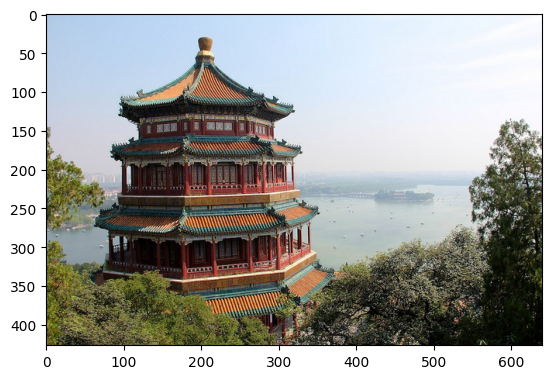

In [6]:
plt.imshow(china)
plt.show()

이미지 numpy.ndarray

*   흑백 이미지 - (height, width) 모양의 2차원 배열
*   컬러 이미지
    *   불투명 이미지 - (height, width, 3) 모양의 3차원 배열
    *   투명도가 있는 이미지 - (height, width, 4) 모양의 3차원 배열
*   이미지 배열의 숫자 스케일
    *   0 ~ 255 정수 배열
    *   0.0 ~ 1.0 실수 배열
*   `matplotlib.image.imsave(file_name, array)` 함수:
    *   이미지 배열 array를 file_name 이름의 이미지 파일(jpg, png, ...)로 저장.
    *   ndarray -> jpg
*   `matplotlib.image.imread(file_name)` 함수:
    *   이미지 파일(jpg, png, ...)을 읽어서 배열(ndarray)를 리턴.
    *   jpg -> ndarry


In [7]:
# china 3차원 배열을 이미지 형식(jpg) 파일로 저장
image.imsave('china_copy.jpg', china)

In [8]:
# jpg 파일을 읽어서 3d ndarray로 변환
result = image.imread('china_copy.jpg')

In [9]:
result.shape

(427, 640, 3)

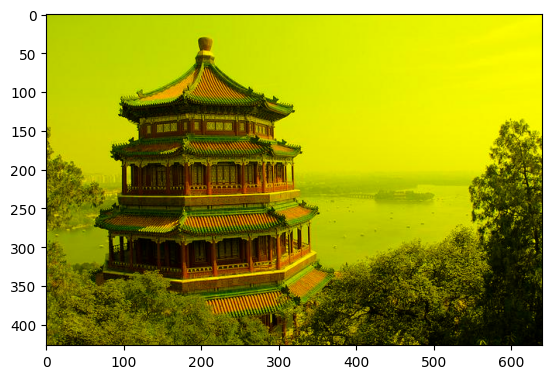

In [10]:
img_copy = result.copy()
img_copy[:, :, 2] = 0  # blue 색상의 값을 제거
plt.imshow(img_copy)
plt.show()

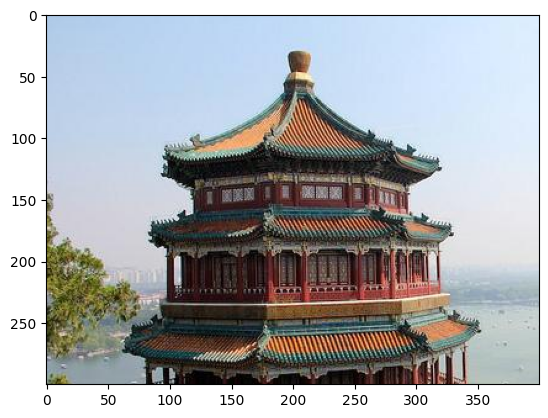

In [11]:
img_crop = result[:300, :400, :]
plt.imshow(img_crop)
plt.show()

# MNIST 데이터셋

70,000개의 숫자 손글씨 흑백 이미지(28x28)가 numpy.ndarray로 저장된 데이터셋.

In [12]:
mnist = datasets.fetch_openml('mnist_784')

In [14]:
print(type(mnist))  #> Bunch 클래스 타입(dict와 비슷)

<class 'sklearn.utils._bunch.Bunch'>


In [15]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [19]:
x = mnist.data.values.copy()  # 특성 배열
y = mnist.target.values.copy()  # 타겟 배열

In [20]:
print(type(x))

<class 'numpy.ndarray'>


In [21]:
print(type(y))

<class 'pandas.core.arrays.categorical.Categorical'>


In [22]:
x.shape  #> (70_000, 784) => (n_samples, n_pixels), 28x28=784

(70000, 784)

In [23]:
y.shape  #> (70_000,) => (n_samples,): 70,000개 이미지의 클래스(레이블, 카테고리)

(70000,)

In [27]:
x[0].min(), x[0].max()  #> 0(black) ~ 255(white) 스케일로 값들이 저장.

(np.int64(0), np.int64(255))

## MNIST 데이터셋 시각화

In [28]:
image_0 = x[0].reshape((28, 28))  #> (784,) 1d array -> (28, 28) 2d array

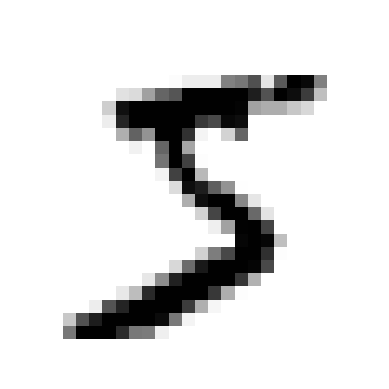

In [32]:
plt.imshow(image_0, cmap=plt.cm.binary)
# cmap=plt.cm.gray: 0(black) ~ 255(white)
# cmap=plt.cm.binary: gray 스케일을 반전. 0(white) ~ 255(black).
plt.axis('off')  # x, y축을 제거
plt.show()

이미지 100개를 10x10 Axes에 시각화

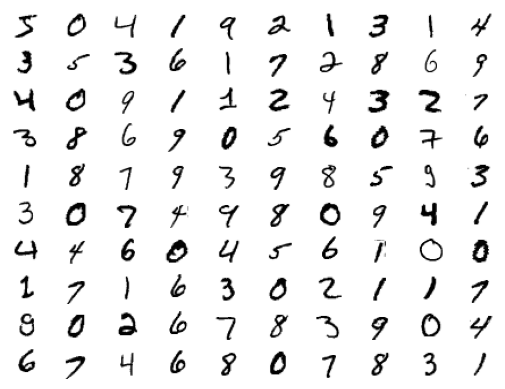

In [35]:
fig, axes = plt.subplots(nrows=10, ncols=10)

for i in range(10):
    for j in range(10):
        idx = i * 10 + j  # idx: 0 ~ 99
        image = x[idx].reshape((28, 28))
        axes[i, j].imshow(image, cmap=plt.cm.binary)
        axes[i, j].axis('off')

plt.show()

In [36]:
y[:10]

['5', '0', '4', '1', '9', '2', '1', '3', '1', '4']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [37]:
np.unique(y, return_counts=True)

(array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958]))

## 훈련 셋, 테스트 셋 나누기

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=10_000,
                                                    random_state=42,
                                                    stratify=y)

In [39]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

# Logistic Regression

In [40]:
logistic = LogisticRegression(n_jobs=-1, random_state=42)

In [41]:
cv = cross_validate(estimator=logistic, X=x_train, y=y_train, n_jobs=-1,
                    return_train_score=True)

In [42]:
cv

{'fit_time': array([42.18941808, 41.19425392, 39.25582314, 40.04999423, 23.65958142]),
 'score_time': array([0.08634758, 0.10399818, 0.09256387, 0.09253407, 0.08294034]),
 'test_score': array([0.915     , 0.92225   , 0.91958333, 0.92008333, 0.92183333]),
 'train_score': array([0.93677083, 0.93539583, 0.9361875 , 0.93614583, 0.93547917])}

In [43]:
print('train score:', np.mean(cv['train_score']))
print('test score:', np.mean(cv['test_score']))

train score: 0.9359958333333334
test score: 0.91975


## 훈련 셋을 (작은) 훈련 셋과 검증 셋으로 나눈 후 Logistic Regression을 훈련/평가

In [44]:
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train,
                                            test_size=0.2,
                                            random_state=42,
                                            stratify=y_train)

In [45]:
logistic = LogisticRegression(n_jobs=-1, random_state=42)  # 모델 생성

In [46]:
logistic.fit(X=x_tr, y=y_tr)  # 모델 훈련 -> 모델 파라미터 찾음.

LogisticRegression(n_jobs=-1, random_state=42)

In [48]:
logistic.coef_.shape  #> (10, 784) => (n_classes, n_features)

(10, 784)

In [50]:
logistic.intercept_.shape  #> (10,) => (n_classes,)

(10,)

In [51]:
train_pred = logistic.predict(X=x_tr)  # 훈련 셋 예측값

In [52]:
train_pred[:10]

array(['6', '1', '4', '7', '3', '5', '1', '0', '2', '4'], dtype=object)

In [53]:
y_tr[:10]

['6', '1', '4', '7', '3', '5', '1', '0', '2', '4']
Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9']

In [54]:
logistic.score(X=x_tr, y=y_tr)  # 훈련 셋 점수(정확도)

0.9355

In [55]:
logistic.score(X=x_val, y=y_val)  # 검증 셋 점수(정확도)

0.9203333333333333

## 예측이 틀린 샘플 분석

In [56]:
cm_train = confusion_matrix(y_true=y_tr, y_pred=train_pred)
cm_train

array([[4617,    0,   10,    7,    5,   25,   25,    9,   28,    7],
       [   1, 5285,   21,   17,    3,   15,    3,   13,   37,    7],
       [  22,   35, 4386,   64,   46,   17,   54,   42,  114,   13],
       [  11,   14,   83, 4500,    5,  111,   11,   33,   94,   35],
       [  10,   15,   22,    9, 4411,    7,   35,   16,   32,  122],
       [  42,   15,   31,  157,   36, 3809,   67,   13,  125,   34],
       [  19,   11,   32,    2,   29,   44, 4551,    5,   20,    2],
       [   9,   14,   49,   20,   34,    4,    3, 4723,   17,  128],
       [  24,   60,   41,   98,   16,  104,   34,   14, 4252,   37],
       [  20,   17,    7,   65,  108,   19,    2,  125,   38, 4370]])

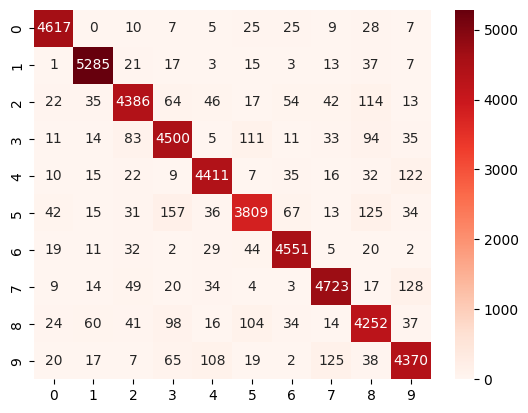

In [57]:
sns.heatmap(data=cm_train, cmap='Reds', annot=True, fmt='d')
plt.show()

틀린 위치를 더 진하게 표현하기 위해서 혼동행렬의 대각선 부분을 0으로 세팅

In [58]:
np.fill_diagonal(cm_train, 0)

In [59]:
cm_train

array([[  0,   0,  10,   7,   5,  25,  25,   9,  28,   7],
       [  1,   0,  21,  17,   3,  15,   3,  13,  37,   7],
       [ 22,  35,   0,  64,  46,  17,  54,  42, 114,  13],
       [ 11,  14,  83,   0,   5, 111,  11,  33,  94,  35],
       [ 10,  15,  22,   9,   0,   7,  35,  16,  32, 122],
       [ 42,  15,  31, 157,  36,   0,  67,  13, 125,  34],
       [ 19,  11,  32,   2,  29,  44,   0,   5,  20,   2],
       [  9,  14,  49,  20,  34,   4,   3,   0,  17, 128],
       [ 24,  60,  41,  98,  16, 104,  34,  14,   0,  37],
       [ 20,  17,   7,  65, 108,  19,   2, 125,  38,   0]])

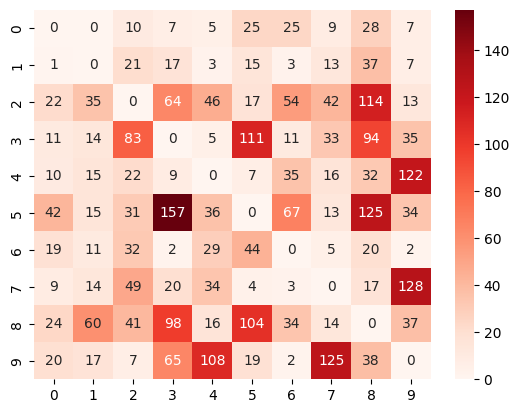

In [61]:
sns.heatmap(data=cm_train, cmap='Reds', annot=True, fmt='d')
plt.show()